


# **CPE019 - Training Neural Networks**

---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: April 2, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---




# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

filepath = "/content/drive/MyDrive/CPE019 - Module 6/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
465,0,124,56,13,105,21.8,0.452,21,0
304,3,150,76,0,0,21.0,0.207,37,0
331,2,87,58,16,52,32.7,0.166,25,0
269,2,146,0,0,0,27.5,0.240,28,1
218,5,85,74,22,0,29.0,1.224,32,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(
    SGD(lr = .003),
    "binary_crossentropy",
    metrics=["accuracy"])

run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 29ms/step - loss: 0.7757 - accuracy: 0.4670 - val_loss: 0.7662 - val_accuracy: 0.4635
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7496 - accuracy: 0.4965 - val_loss: 0.7439 - val_accuracy: 0.5000
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7276 - accuracy: 0.5191 - val_loss: 0.7246 - val_accuracy: 0.5000
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.7088 - accuracy: 0.5382 - val_loss: 0.7078 - val_accuracy: 0.5312
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5538 - val_loss: 0.6930 - val_accuracy: 0.5365
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.5885 - val_loss: 0.6798 - val_accuracy: 0.5677
Epoch 7/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6651 - accuracy: 0.5972 - val_loss: 0.6679 - val_accuracy: 0.5833
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.


y_pred_prob_nn_1 = model.predict(X_test_norm)

y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.55528367],
       [0.72585726],
       [0.20858857],
       [0.31870186],
       [0.14941032],
       [0.50319856],
       [0.02645556],
       [0.26639014],
       [0.89035505],
       [0.16096164]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.745
roc-auc is 0.825


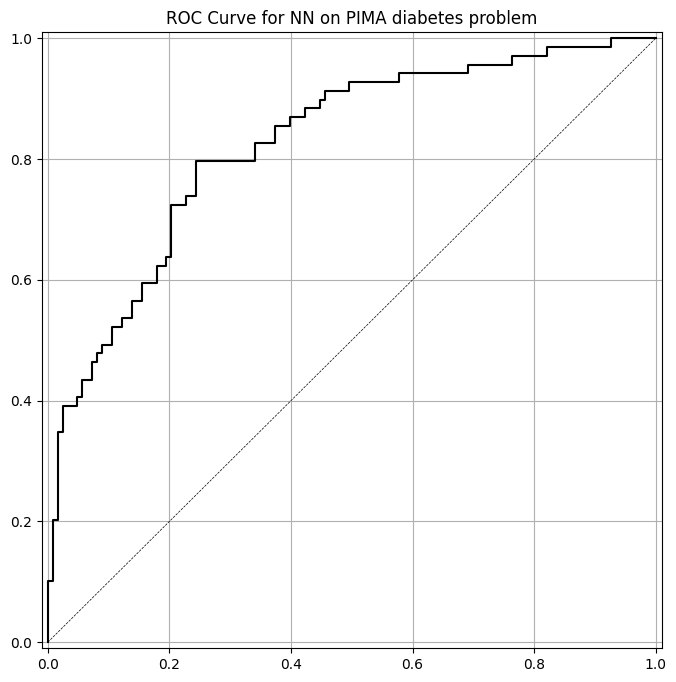

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

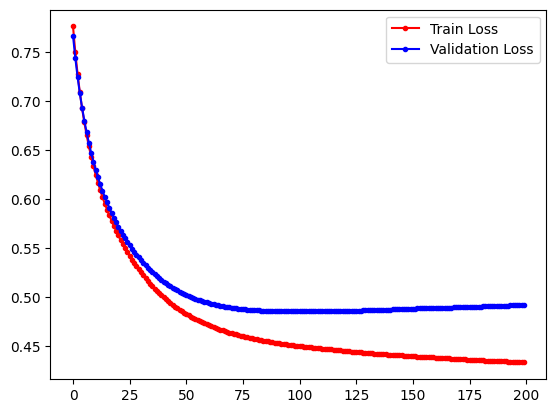

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

What is your interpretation about the result of the train and validation loss?

1. The model is slightly `overfitting` as shown in the result of the train and validation loss. The gap between the validation and train loss is growing as it reach the 200th epoch.
2. The ***possible*** solutions in order to create a better model are reducing the model's capacity, regularization and checking whether the train and validation are statistically equivalent.


#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

### Loading the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, accuracy_score


%matplotlib inline

## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD

filepath = "/content/drive/MyDrive/CPE019 - Module 6/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)



normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

#### Test 1:

- Learning rate: 0.003
- \# of epochs: 1500
- Network structure: 3 layers




In [ ]:
model1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model1.compile(
    SGD(lr = .003),
    "binary_crossentropy",
    metrics=["accuracy"])

run_hist_1 = model1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)


Epoch 1/1500
18/18 [==============================] - 1s 14ms/step - loss: 0.6469 - accuracy: 0.6372 - val_loss: 0.6679 - val_accuracy: 0.6042
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.6493 - val_loss: 0.6605 - val_accuracy: 0.6198
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6295 - accuracy: 0.6528 - val_loss: 0.6535 - val_accuracy: 0.6198
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6215 - accuracy: 0.6528 - val_loss: 0.6471 - val_accuracy: 0.6198
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6138 - accuracy: 0.6545 - val_loss: 0.6413 - val_accuracy: 0.6198
Epoch 6/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.6580 - val_loss: 0.6358 - val_accuracy: 0.6198
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.6615 - val_loss: 0.6309 - val_accuracy: 0.6250
Epoch

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.


y_pred_prob_nn_1 = model1.predict(X_test_norm)

y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



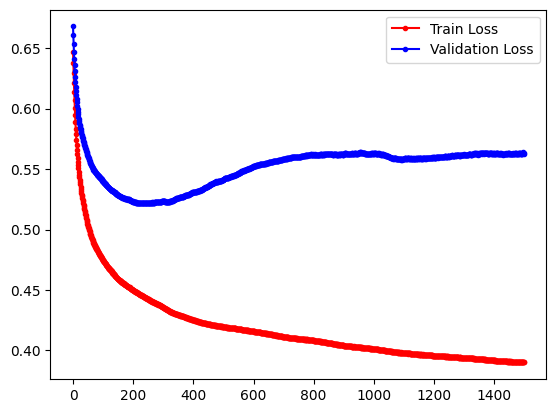

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

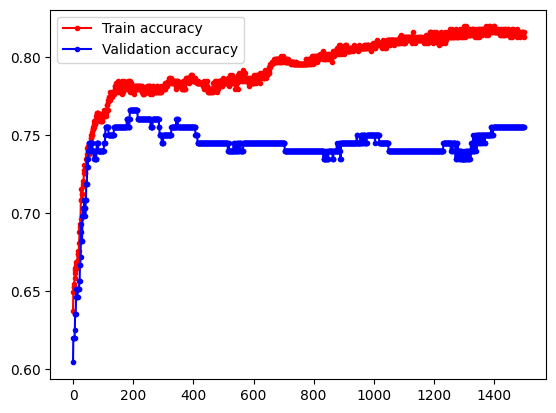

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()

accuracy is 0.755
roc-auc is 0.804


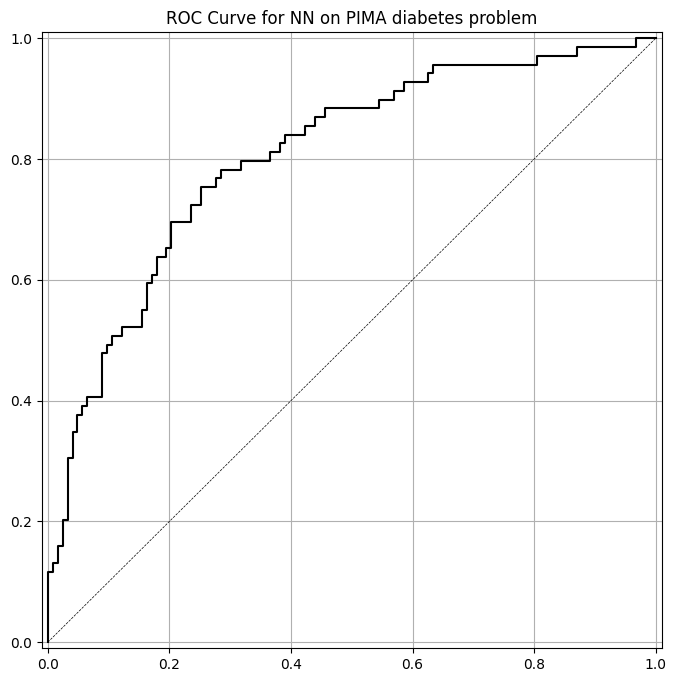

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

##### <font color = 'red'> **Remarks** <font>


**Train and Validation Loss**
- the results show that the model is overfitting.
- the number of iterations or epoch is too many resulting to the curve of the train and validation distance to be widen a lot.

**Train and Validation Accuracy**

- As shown in the model it is shows that the accuracy increases but stayed at around 75 % accuracy.
- This simply means that the model is overfit.
- The model's accuracy is also bad as it is only around 75%.

**ROC Curve**

- The ROC-AUC value is 80, indicating that it is relatively high or close to 1 but as shown in the previous results of accuracy and loss. It simply means that it has a good classification but it fails to generalize well with respect to the loss and accuracy results.







#### Test 2:

- Learning rate: 0.005
-  \# of epochs: 100
- Network structure: 4 layers(16, 12, 8, 1 nodes)


In [ ]:
model2  = Sequential([
    Dense(16, input_shape=(8,), activation="relu"),
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(8, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 16)                144       
                                                                 
 dense_45 (Dense)            (None, 12)                204       
                                                                 
 dense_46 (Dense)            (None, 8)                 104       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(
    SGD(lr = .005),
    "binary_crossentropy",
    metrics=["accuracy"])

run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100)


Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 0.7894 - accuracy: 0.3090 - val_loss: 0.7517 - val_accuracy: 0.3125
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7404 - accuracy: 0.3924 - val_loss: 0.7190 - val_accuracy: 0.3854
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.4688 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5625 - val_loss: 0.6853 - val_accuracy: 0.6146
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6775 - accuracy: 0.6250 - val_loss: 0.6752 - val_accuracy: 0.6250
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.6424 - val_loss: 0.6674 - val_accuracy: 0.6198
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.6476 - val_loss: 0.6610 - val_accuracy: 0.6250
Epoch 8/100


In [ ]:
y_pred_prob_nn_2 = model2.predict(X_test_norm)
y_pred_class_nn_2 = (y_pred_prob_nn_2 > 0.5).astype(int)

6/6 [==============================] - 0s 3ms/step


accuracy is 0.740
roc-auc is 0.814


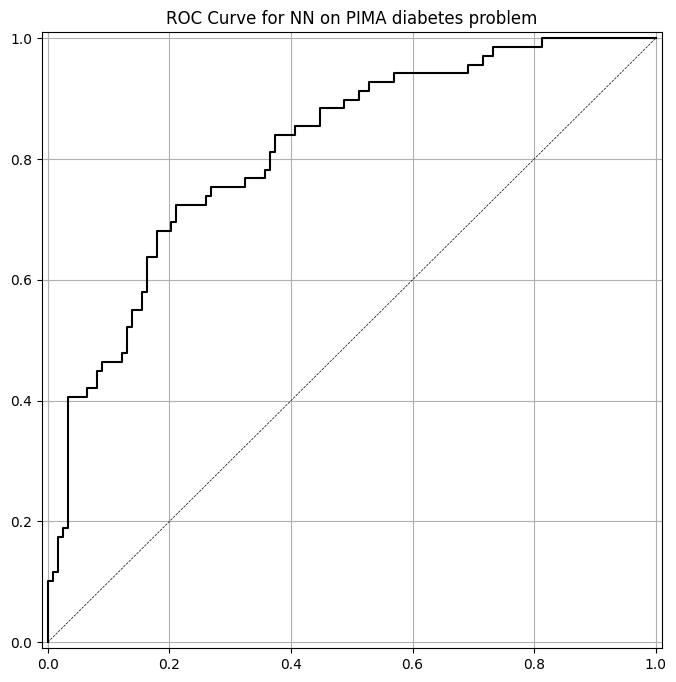

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

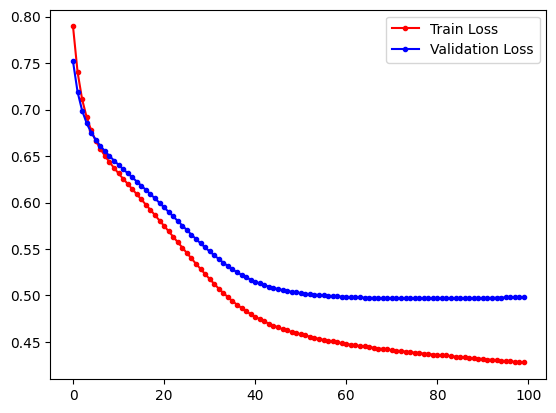

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

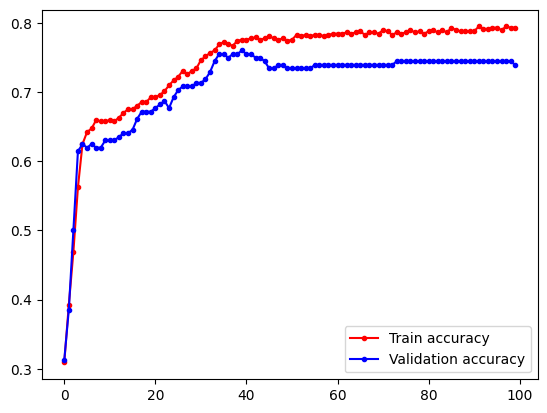

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(run_hist_2.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()

##### <font color = 'red'> **Remarks:**

**Train and validation Loss**
- The model is still overfit but compared to the previous task with 1500 epoch, the performance of this model is significantly better. Nevertheless, it is still overfit and needs a fine tune of parameters or even adjusting the training data set

**Train and Validation Accuracy**
- The model accuracy against the train and validation is higher and closer to each other compred to the last result. Although the model is slightly perfoming better in classification, it is still overfit as shown in the stagnant accuracy at around 45 to 100 epoch.
- The model is still not on 95% therefore, the overall performance of the accuracy is not good.

**ROC Curve**
- The model is relatively close to 1 with a score of 81. This model is slightly better in terms of classification compared to the previous model. The ROC curve still indicates that the performance has good classification but with respect to the previous results of accuracy and loss, it can be said that the data is still doesn't generalize well.

#### Test 3:

- Learning rate: 0.001
- \# of epochs: 200
- Network structure: 5 layers



In [ ]:
model3  = Sequential([
    Dense(16, input_shape=(8,), activation="relu"),
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(8, input_shape=(8,), activation="relu"),
    Dense(4, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 16)                144       
                                                                 
 dense_68 (Dense)            (None, 12)                204       
                                                                 
 dense_69 (Dense)            (None, 8)                 104       
                                                                 
 dense_70 (Dense)            (None, 4)                 36        
                                                                 
 dense_71 (Dense)            (None, 1)                 5         
                                                                 
Total params: 493 (1.93 KB)
Trainable params: 493 (1.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(
    SGD(learning_rate = .001),
    "binary_crossentropy",
    metrics=["accuracy"])

run_hist_3 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 2s 16ms/step - loss: 0.6924 - accuracy: 0.5069 - val_loss: 0.6882 - val_accuracy: 0.4740
Epoch 2/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6912 - accuracy: 0.5087 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.5104 - val_loss: 0.6863 - val_accuracy: 0.5417
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5278 - val_loss: 0.6853 - val_accuracy: 0.5469
Epoch 5/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.5417 - val_loss: 0.6844 - val_accuracy: 0.5573
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.5642 - val_loss: 0.6835 - val_accuracy: 0.5781
Epoch 7/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6856 - accuracy: 0.5747 - val_loss: 0.6826 - val_accuracy: 0.6094
Epoch 8/200


In [ ]:
y_pred_prob_nn_3 = model3.predict(X_test_norm)
y_pred_class_nn_3 = (y_pred_prob_nn_3 > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


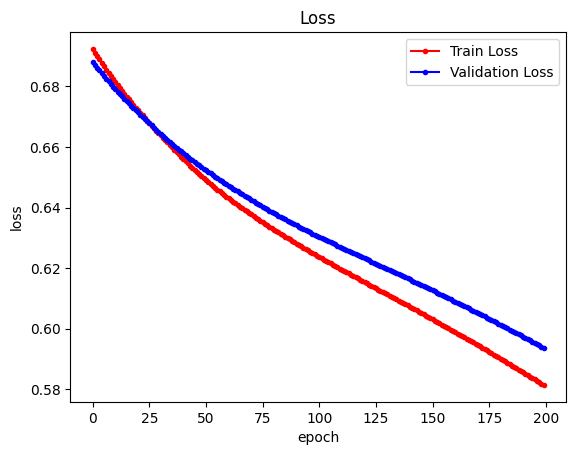

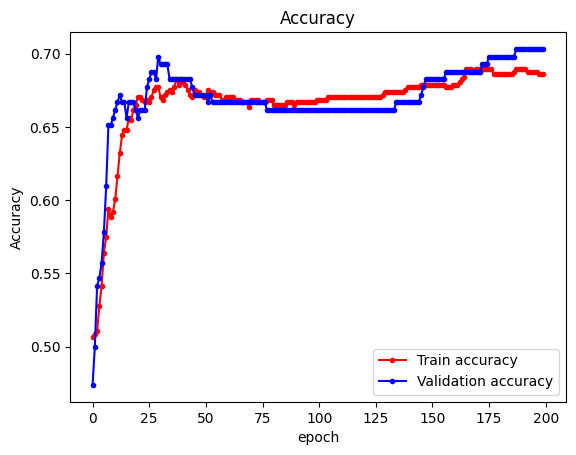

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
ax.legend()
print("\n")

fig, ax = plt.subplots()
ax.plot(run_hist_3.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(run_hist_3.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
ax.legend()

accuracy is 0.703
roc-auc is 0.740


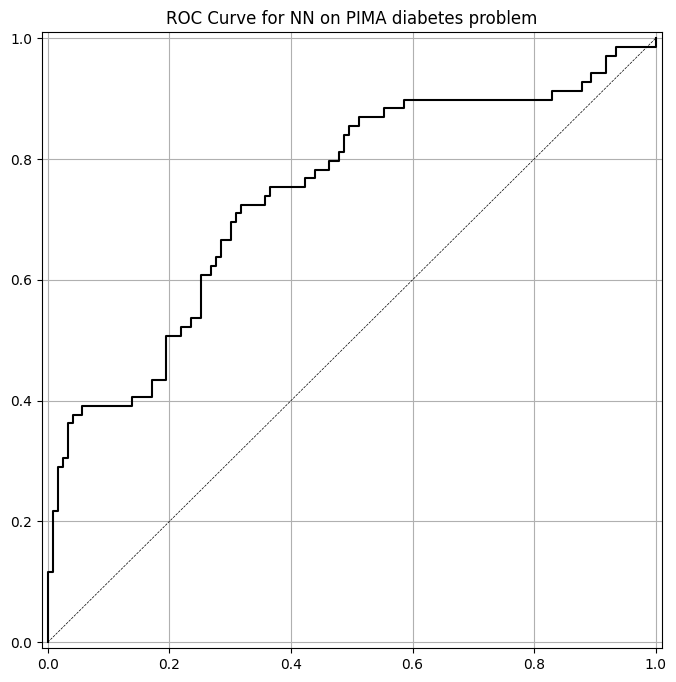

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_3, 'NN')

##### <font color = 'red'> **Remarks:**

**Train and validation Loss**
- the loss shows that it is slightly overfit. Upon observation it can be seen that as the epoch increases, the distance with validation and train is increasing.

**Train and Validation Accuracy**
- the accuracy of the data shows that the validation accuracy is higher than the training. When the accuracy of a validation is higher comapred to the training then it could be said that it is overfit. With the help of the loss results, we can really say that it is overfit.

**ROC Curve**
- the ROC shows that it is slightly doing well but compared to the previous 2 models, it is the worst. This means that the model can can classify but with a slightly okay accuracy.




#### Test 4:
- Learning rate: .00509
- \# of epochs: 100
- Network structure: 4 layers



In [ ]:
model4  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6)                 54        
                                                                 
 dense_21 (Dense)            (None, 6)                 42        
                                                                 
 dense_22 (Dense)            (None, 6)                 42        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model4.compile(
    SGD(learning_rate = .00509),
    "binary_crossentropy",
    metrics=["accuracy"])

run_hist_4 = model4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100)


Epoch 1/100
18/18 [==============================] - 2s 25ms/step - loss: 0.6963 - accuracy: 0.5156 - val_loss: 0.6858 - val_accuracy: 0.5729
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.5625 - val_loss: 0.6790 - val_accuracy: 0.5833
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6807 - accuracy: 0.5816 - val_loss: 0.6731 - val_accuracy: 0.6198
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6742 - accuracy: 0.6042 - val_loss: 0.6679 - val_accuracy: 0.6302
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6684 - accuracy: 0.6250 - val_loss: 0.6632 - val_accuracy: 0.6250
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6633 - accuracy: 0.6424 - val_loss: 0.6591 - val_accuracy: 0.6667
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6586 - accuracy: 0.6649 - val_loss: 0.6554 - val_accuracy: 0.6562
Epoch 8/100

In [ ]:
y_pred_prob_nn_4 = model4.predict(X_test_norm)
y_pred_class_nn_4 = (y_pred_prob_nn_4 > 0.5).astype(int)

6/6 [==============================] - 0s 4ms/step


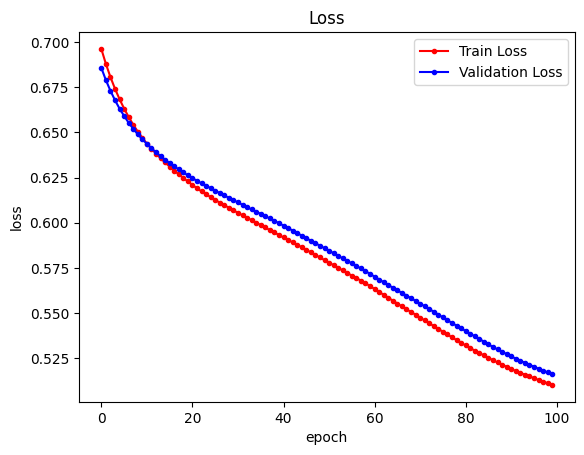

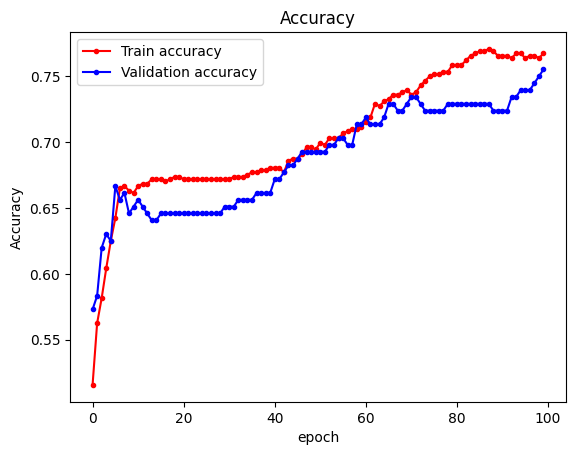

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
ax.legend()
print("\n")

fig, ax = plt.subplots()
ax.plot(run_hist_4.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(run_hist_4.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
ax.legend()

accuracy is 0.755
roc-auc is 0.807


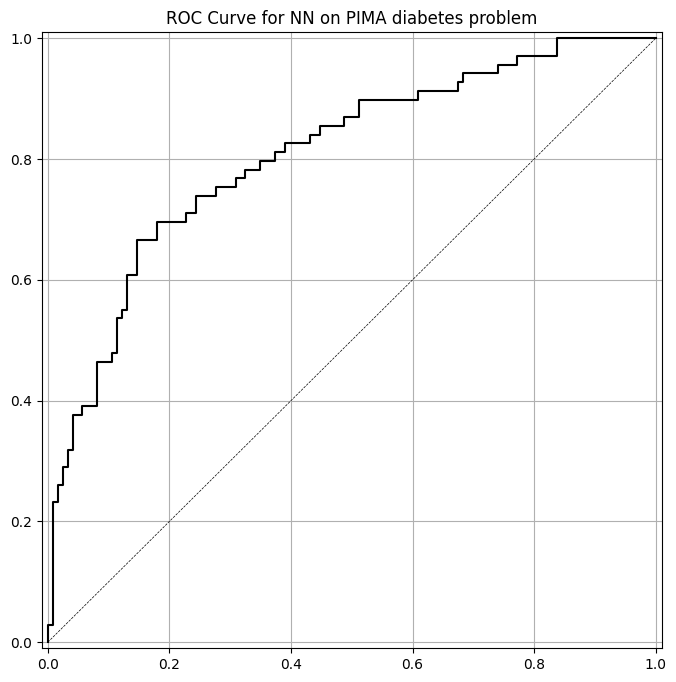

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_4)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_4)))

plot_roc(y_test, y_pred_prob_nn_4, 'NN')

##### <font color = 'red'> **Remarks:**

**Train and Validation Loss**
- As shown in the plotting the model is a **good fit**. The combination of learning rate, complexity of network and number of epoch create a good result of the validation and trainingg loss. Copared to the previous attempts which all resulted to overfit, this model was hyper tuned with less layers and number of nodes.

**Train and Validation Accuracy**
-  Among all the models, this has the highest accuracy score. This doesn't necesarriliy mean that the performance of the model is good as it did not reach the 95% accuracy. This can be still be improved by different methods such as data cleaning and hypertuning of model parameters.To put simply, under unkown data set, the model is doing okay.

**ROC Curve**

 - the model shows that it has an okay classification. The curve of the ROC is closer to the top left of the graph indicating that it has an okay classification of true positives and negatives.



### Conclusion

After condung the activity the following are my conclusions:

1. Increasing the model complexity can result to overfitting. This is clearly showin in tests 1 to 3 where in as I add more layers, the accuracy and loss also increases. Comparing it to the procedure's result wherein it is less complex, It can be concluded that complexity of a model contributes a lot on the loss and accuracy of the model

2. The number of epoch affect's the model's performance. It doesn't necessarily mean that the higher the epoch the model would learn better. The epoch should be stopped if the values or the accuracy and loss does not improve. Upon reasearching, it is said that the rule of thumb in terms of choosing a starting epoch is the number of columns or features in the data set and multiplying it by three. Although this is a good starter, it doesn't necessarily mean it will result good. I have found a function in keras called keras.callbacks.callbacks.EarlyStopping(). This function helps in stopping if the model's performance does not improve after certain number of iterations and will stop the training immediately if was observed. This is a good practice or use to avoid overfitting.



3. The learning rate hyper tuning affects how the model's perforamnce would be. Upon research there is no such thing as a standard learning rate. A good practice upon research is starting with the default and trying a larger learing rate and lower learning rate with a fixed number of epoch. This will greatly help in checking the behavior of the model if we have to increase or decrease the learning rate

4. ROC curve helps in identifying whether to check the trade-off between the sensitiviy and 1-specificity across different classification thresholds. ROC curve helps in determining the best threshold. Lastly, the AUC produced while plotting the ROC curve is a good indicator of the distiguishing power of the model between positive and negative classes. A good ROC is closer to the upper left (1) and a good AUC has a greater area under cureve.



Resources:

ROC curve
- https://acutecaretesting.org/en/articles/roc-curves-what-are-they-and-how-are-they-used#:~:text=The%20ROC%20curve%20is%20a,TP%2F(TP%2BFN))

Loss and Model fits
- https://medium.com/@satyam3196/everything-you-need-to-know-about-model-fitting-in-machine-learning-4f93dccc6bf1
-https://www.youtube.com/watch?v=nt5DwCuYY5c
- https://medium.com/@datascienceeurope/do-you-know-overfitting-and-underfitting-f27f87ac2f37
- https://www.youtube.com/watch?v=nt5DwCuYY5c
- https://www.baeldung.com/cs/learning-curve-ml

Epoch
- https://gretel.ai/gretel-synthetics-faqs/how-many-epochs-should-i-train-my-model-with
- https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/


learing rate
- https://towardsdatascience.com/how-to-choose-the-optimal-learning-rate-for-neural-networks-362111c5c783

Accuracy
- https://www.kaggle.com/discussions/questions-and-answers/250648